In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Fake News Exploration

In [9]:
fake = pd.read_csv("C:/Users/vinay/Desktop/Fake News Detection System/dataset/Fake.csv")

In [10]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [11]:
for key,count in fake.subject.value_counts().items():
    print(f"{key}:\t{count}")
    
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


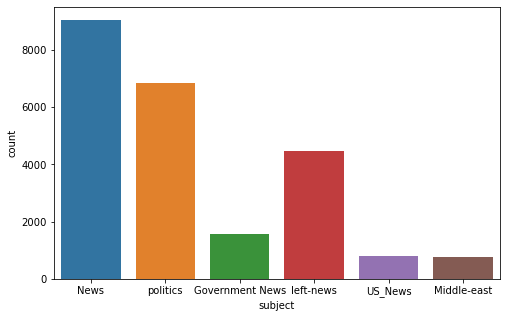

In [6]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.show()

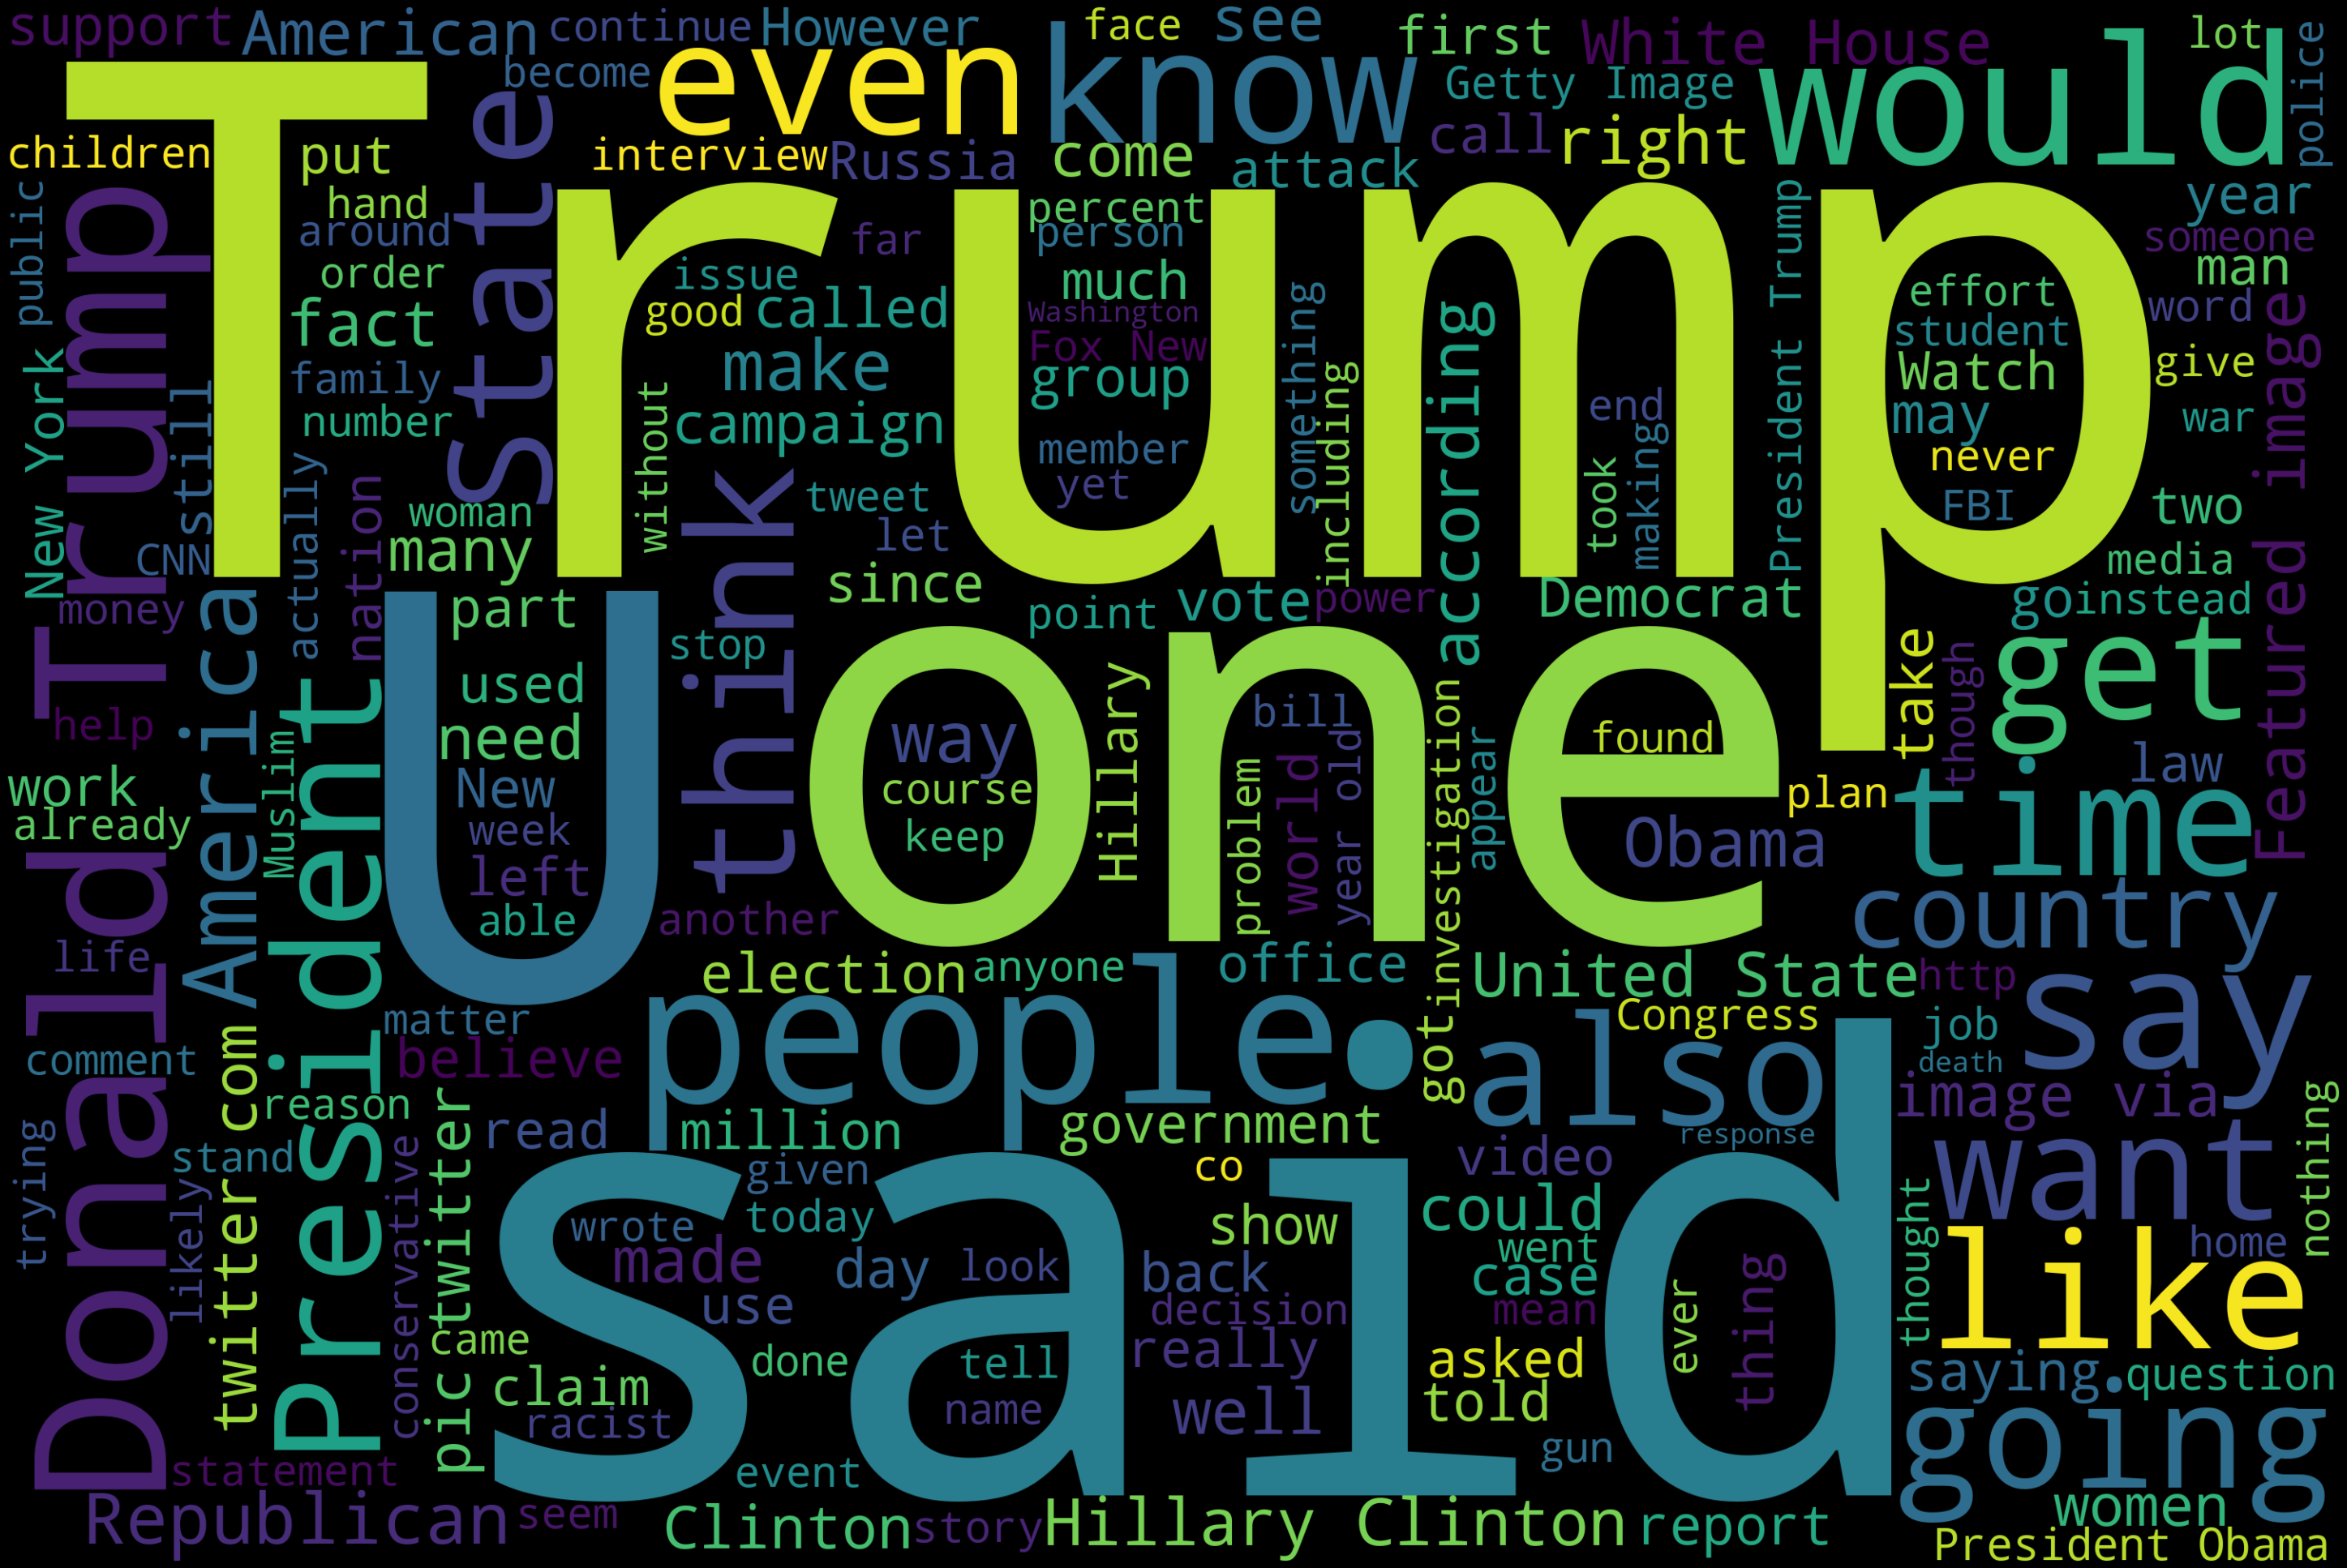

In [8]:
#Word Cloud
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# Real News Exploration

In [12]:
real = pd.read_csv("C:/Users/vinay/Desktop/Fake News Detection System/dataset/True.csv")
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

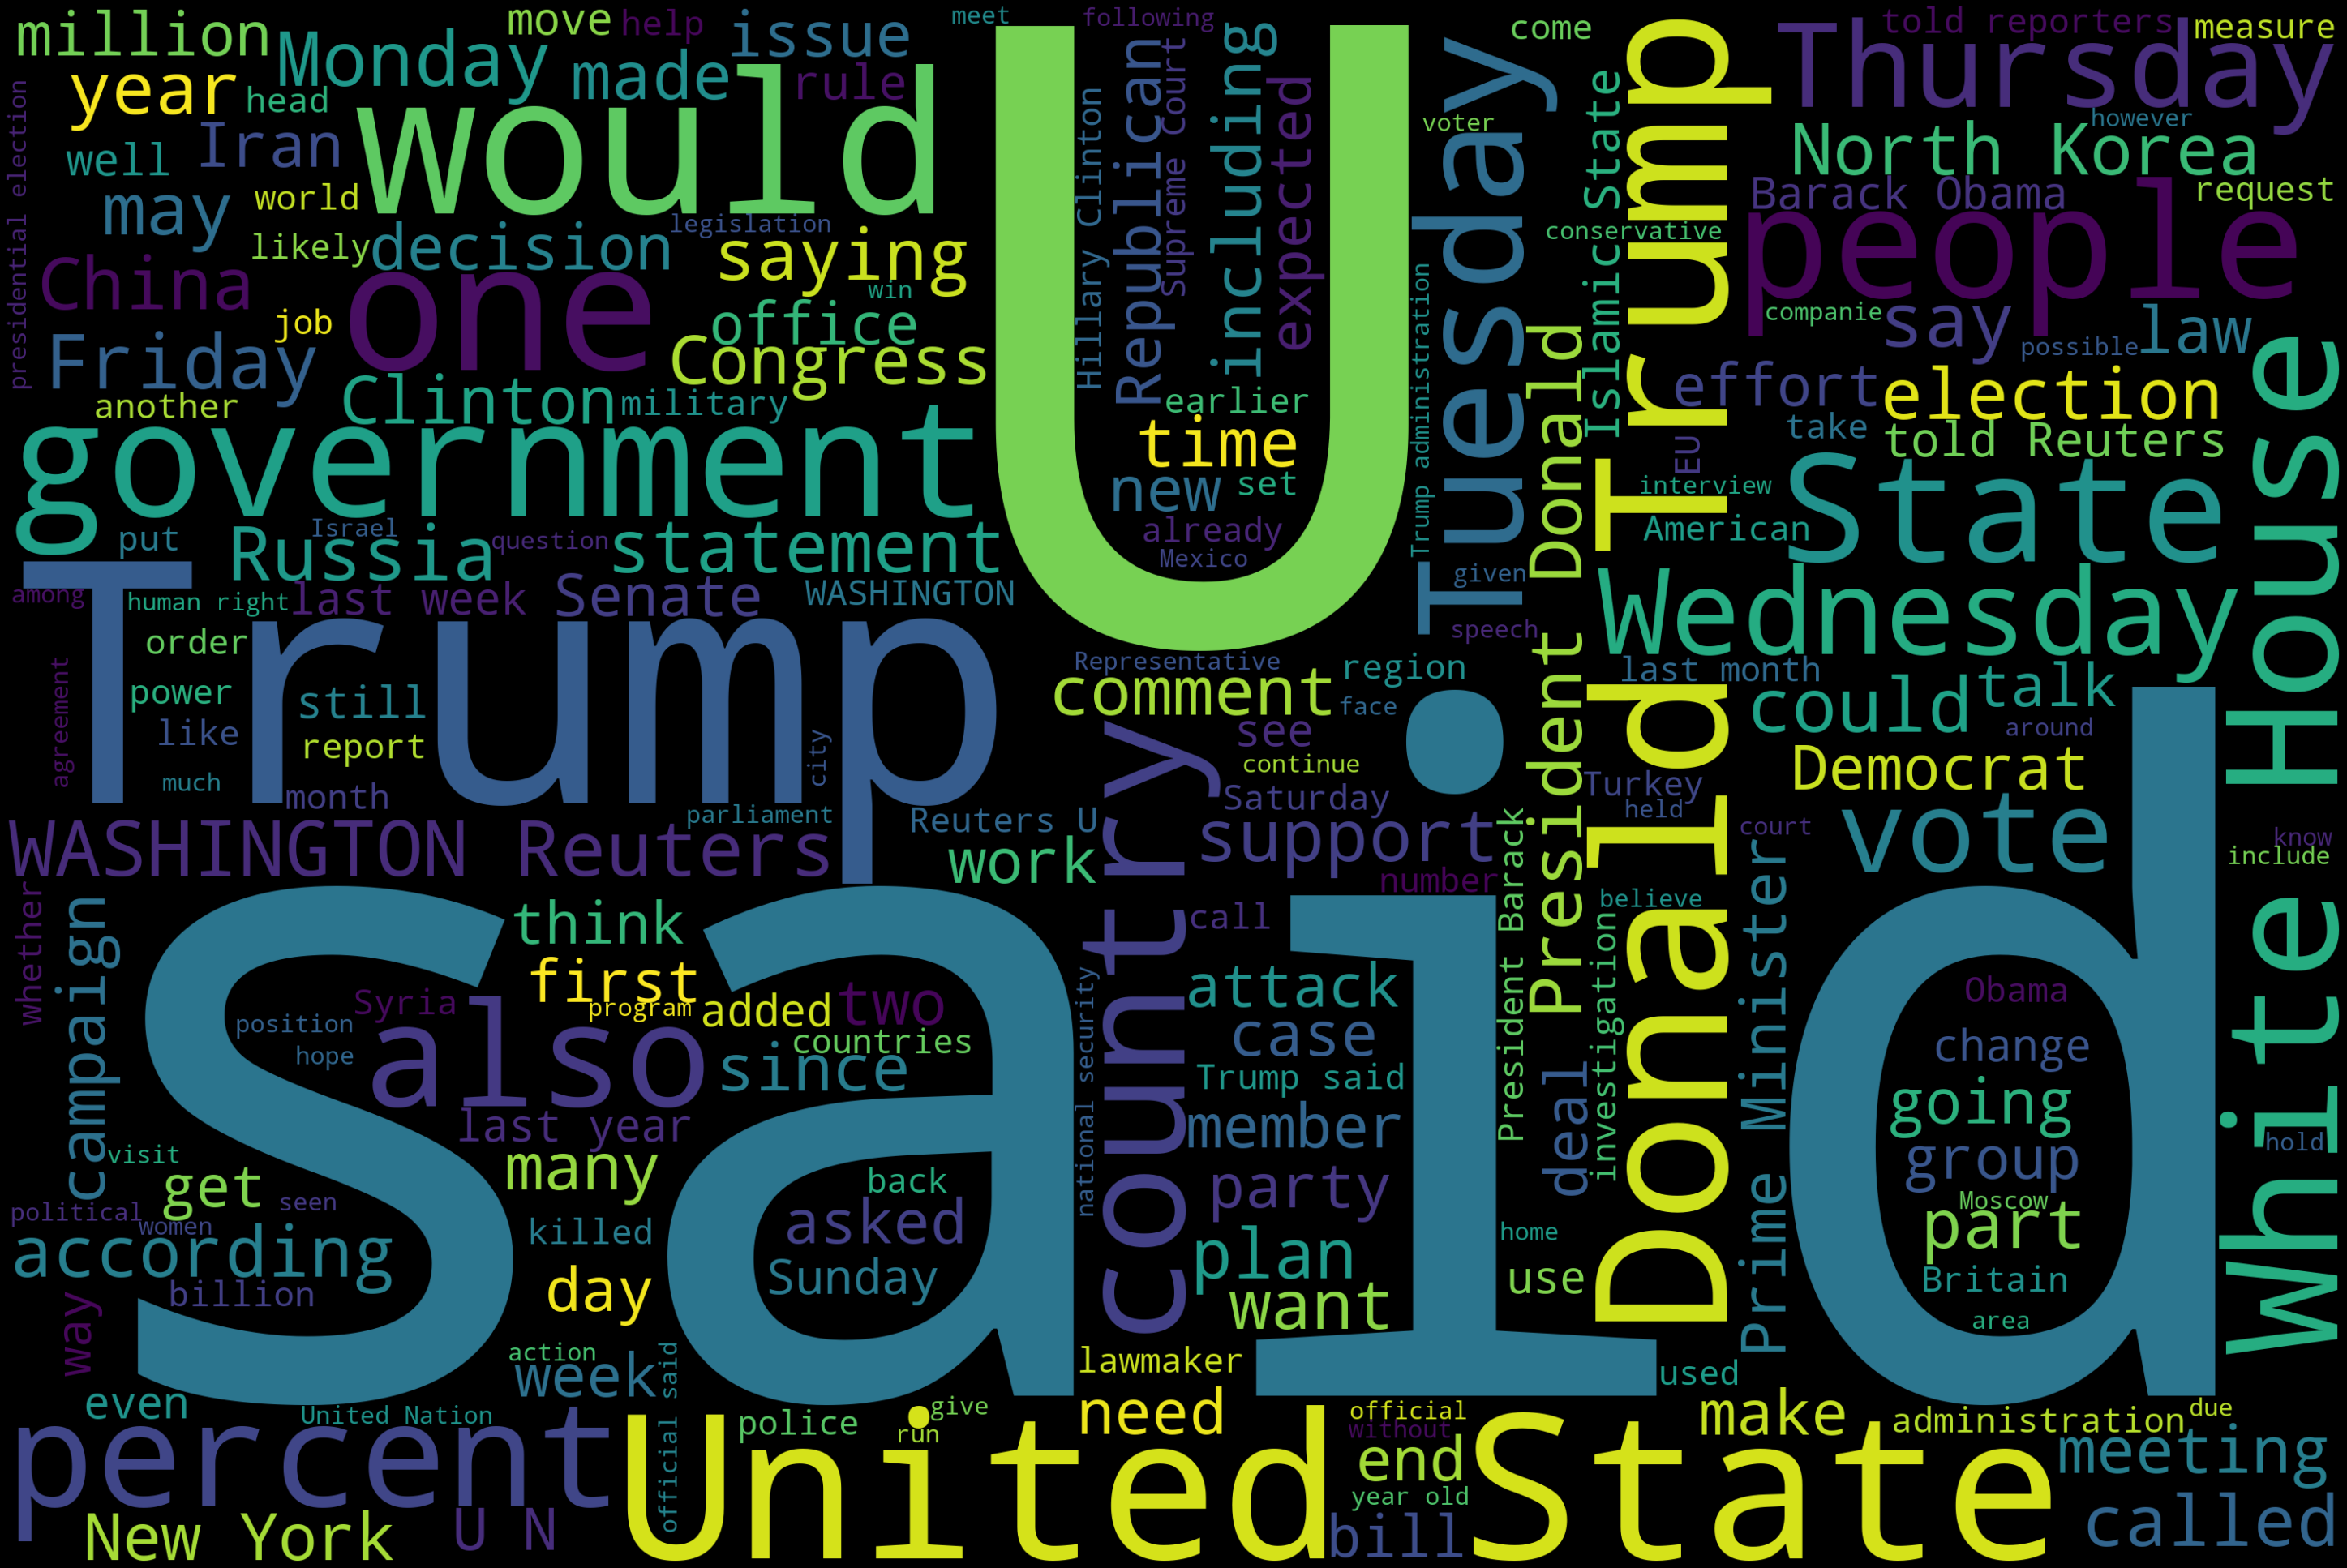

In [10]:
#Word Cloud
text = ''
for news in real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# Real News data cleaning

In [111]:
real.sample(5)

title  \
12484  Tight race as South Africa's ANC prepares to e...   
6193   U.S. governors want Congress to keep funding h...   
19993  Ukraine's Poroshenko suggests IMF-backed anti-...   
11005  Adele: No permission given to political campai...   
3268   Trump to nominate ex-NYSE Euronext VP Dawn DeB...   

                                                    text       subject  \
12484  JOHANNESBURG (Reuters) - South Africa s ruling...     worldnews   
6193   WASHINGTON (Reuters) - U.S. Republican governo...  politicsNews   
19993  KIEV (Reuters) - Ukrainian President Petro Por...     worldnews   
11005  (Reuters) - British singer Adele made clear on...  politicsNews   
3268   WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   

                      date  
12484   December 12, 2017   
6193     January 20, 2017   
19993  September 15, 2017   
11005    February 2, 2016   
3268        June 10, 2017

In [13]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [14]:
real=real.drop(8970,axis=0)

In [15]:
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        record[1]
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [16]:
len(unknown_publishers)

22

In [116]:
real.iloc[unknown_publishers].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
9008     The following timeline charts the origin and s.

In [17]:
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [18]:
real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [19]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0   The head of a conservative Republican faction...  politicsNews   
1   Transgender people will be allowed for the fi...  politicsNews   
2   The special counsel investigation of links be...  politicsNews   
3   Trump campaign adviser George Papadopoulos to...  politicsNews   
4   President Donald Trump called on the U.S. Pos...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [20]:
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


title text    subject  \
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015

In [21]:
print(f"Total Records:\t{real.shape[0]}")

for key,count in real.subject.value_counts().items():
  print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


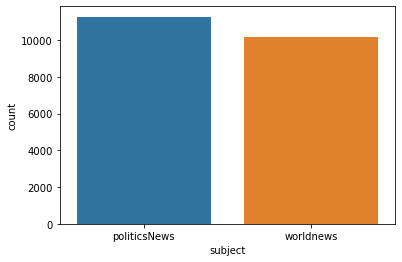

In [22]:
sns.countplot(x="subject", data=real)
plt.show()

# Preprocessing of Data

In [23]:
real["class"] = 1
fake["class"] = 0

In [24]:
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [25]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [26]:
real = real.drop(["subject", "date","title",  "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [27]:
data=pd.concat([real, fake])
del real, fake

In [128]:
data.sample(5)

text  class
6317    Melania Trump: Reporter ‘Provoked’ Anti-Semit...      0
19497  JOE BIDEN’S SHOCKING ANNOUNCEMENT: “What the h...      0
18735  WATCH: BIKERS FOR TRUMP Ready To Take A Stand ...      0
4789   Behind the scenes, bank lobbyists temper expec...      1
12820  Italy's 5-Star sheds anti-EU image, calls for ...      1

Removing StopWords, Punctuations and single-character words

In [28]:
y = data["class"].values
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

# Vector Conversion

In [7]:
import gensim

In [34]:
EMBEDDING_DIM = 100

w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

# Exploring Vectors

In [44]:
w2v_model.wv.most_similar("iran")

[('tehran', 0.880413293838501),
 ('iranian', 0.7536056041717529),
 ('destabilizing', 0.6493777632713318),
 ('iranians', 0.6381713151931763),
 ('hezbollah', 0.6363306641578674),
 ('nuclear', 0.6165866851806641),
 ('jcpoa', 0.607634425163269),
 ('riyadh', 0.6043016910552979),
 ('saudis', 0.60157710313797),
 ('turkey', 0.5982886552810669)]

In [27]:
w2v_model.wv.most_similar("india")

[('pakistan', 0.7478911876678467),
 ('china', 0.6894373297691345),
 ('malaysia', 0.6736133694648743),
 ('philippines', 0.6669944524765015),
 ('japan', 0.6527250409126282),
 ('thailand', 0.6381607055664062),
 ('asia', 0.6153067350387573),
 ('australia', 0.6118758916854858),
 ('modi', 0.5870307683944702),
 ('waterway', 0.5865634083747864)]

In [134]:
w2v_model.wv.most_similar("us")

[('country', 0.6128473877906799),
 ('america', 0.582435131072998),
 ('americans', 0.5142579674720764),
 ('nation', 0.5076684355735779),
 ('american', 0.5057327151298523),
 ('europeans', 0.5041106343269348),
 ('know', 0.48559731245040894),
 ('believe', 0.48261839151382446),
 ('everyone', 0.48072853684425354),
 ('must', 0.47476598620414734)]

In [131]:
w2v_model.wv.most_similar("fbi")

[('comey', 0.7204692363739014),
 ('cia', 0.6180963516235352),
 ('investigators', 0.6160093545913696),
 ('investigation', 0.5930219888687134),
 ('mueller', 0.5850467681884766),
 ('doj', 0.5789406299591064),
 ('inquiry', 0.549005925655365),
 ('investigations', 0.5361654758453369),
 ('investigated', 0.5302990674972534),
 ('classified', 0.5297566056251526)]

In [135]:
w2v_model.wv.most_similar("modi")

[('narendra', 0.7780168652534485),
 ('india', 0.5932320952415466),
 ('taipei', 0.5720869302749634),
 ('najib', 0.5696876645088196),
 ('trudeau', 0.5567575097084045),
 ('abe', 0.5535510182380676),
 ('renames', 0.5388510227203369),
 ('xi', 0.5312841534614563),
 ('taiwan', 0.5258727073669434),
 ('beijing', 0.5254553556442261)]

In [35]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [24]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break        

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
obama -> 9
also -> 10


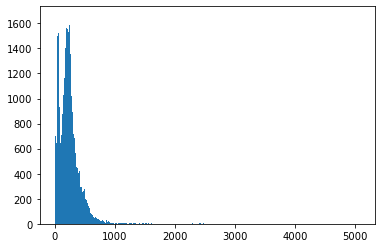

In [29]:
plt.hist([len(x) for x in X], bins=500)
plt.show()

In [36]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])

43982

In [37]:
maxlen = 700 

X = pad_sequences(X, maxlen=maxlen)

In [38]:
len(X[0])

700

In [39]:
vocab_size = len(tokenizer.word_index) + 1
vocab=tokenizer.word_index

In [40]:
def get_weight_matrix(model):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [41]:
embedding_vectors = get_weight_matrix(w2v_model)

C:\Users\vinay\AppData\Local\Temp/ipykernel_20616/4186170491.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  weight_matrix[i] = model[word]


In [42]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          12224900  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 12,342,277
Trainable params: 117,377
Non-trainable params: 12,224,900
_________________________________________________________________


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [47]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 377s 509ms/step - loss: 0.1311 - acc: 0.9530 - val_loss: 0.1145 - val_acc: 0.9580
Epoch 2/6
737/737 [==============================] - 399s 542ms/step - loss: 0.0834 - acc: 0.9716 - val_loss: 0.0636 - val_acc: 0.9769
Epoch 3/6
737/737 [==============================] - 380s 516ms/step - loss: 0.0407 - acc: 0.9861 - val_loss: 0.0405 - val_acc: 0.9864
Epoch 4/6
737/737 [==============================] - 403s 547ms/step - loss: 0.0337 - acc: 0.9889 - val_loss: 0.0331 - val_acc: 0.9880
Epoch 5/6
737/737 [==============================] - 390s 530ms/step - loss: 0.0169 - acc: 0.9944 - val_loss: 0.0299 - val_acc: 0.9904
Epoch 6/6
737/737 [==============================] - 393s 533ms/step - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0298 - val_acc: 0.9911


In [48]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")

351/351 [==============================] - 54s 154ms/step


In [49]:
accuracy_score(y_test, y_pred)

0.9911804008908686

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5865
           1       0.99      0.99      0.99      5360

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Testing

In [86]:
x=['A gift-wrapped package addressed to U.S. Treasury Secretary Steven Mnuchinâ€™s home in a posh Los Angeles neighborhood that was suspected of being a bomb was instead filled with horse manure, police told local media. The package was found Saturday evening in a next-door neighborâ€™s driveway in Bel Air, the Los Angeles Police Department told the Los Angeles Times and KNBC television, the NBC affiliate in Los Angeles. The package also included a Christmas card with negative comments about President Donald Trump and the new U.S. tax law signed by Trump last week. Reuters could not reach LAPD officials for comment on Sunday. An LAPD bomb squad X-rayed the package before opening it and found the horse manure inside, police told local media. Aerial footage from KNBC showed officers investigating a large box in wrapping paper, then dumping a large amount of what they later identified as the manure and opening the card that was included inside.  Mnuchin, who KNBC said was not home when the package was discovered, is a former Goldman Sachs Group Inc executive and Hollywood film financier. A road in Bel Air was closed for about two hours, KNBC reported. The U.S. Secret Service is also investigating the incident, according to the TV station. ']
tokenizer.fit_on_texts(x)
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=700)

In [87]:
(model.predict(x) >= 0.5).astype("int")

1/1 [==============================] - 0s 69ms/step


array([[1]])

# model saving

In [54]:
import pickle

In [61]:
import tensorflow as tf
path = './model.h5'
model.save(path )
loaded_model= tf.keras.models.load_model(path )

In [88]:
(loaded_model.predict(x) >= 0.5).astype("int")

1/1 [==============================] - 0s 51ms/step


array([[1]])